In [1]:
from chatgpt.mdp import MDP
from chatgpt.mdp_nodes import StateNode
import mdpviz

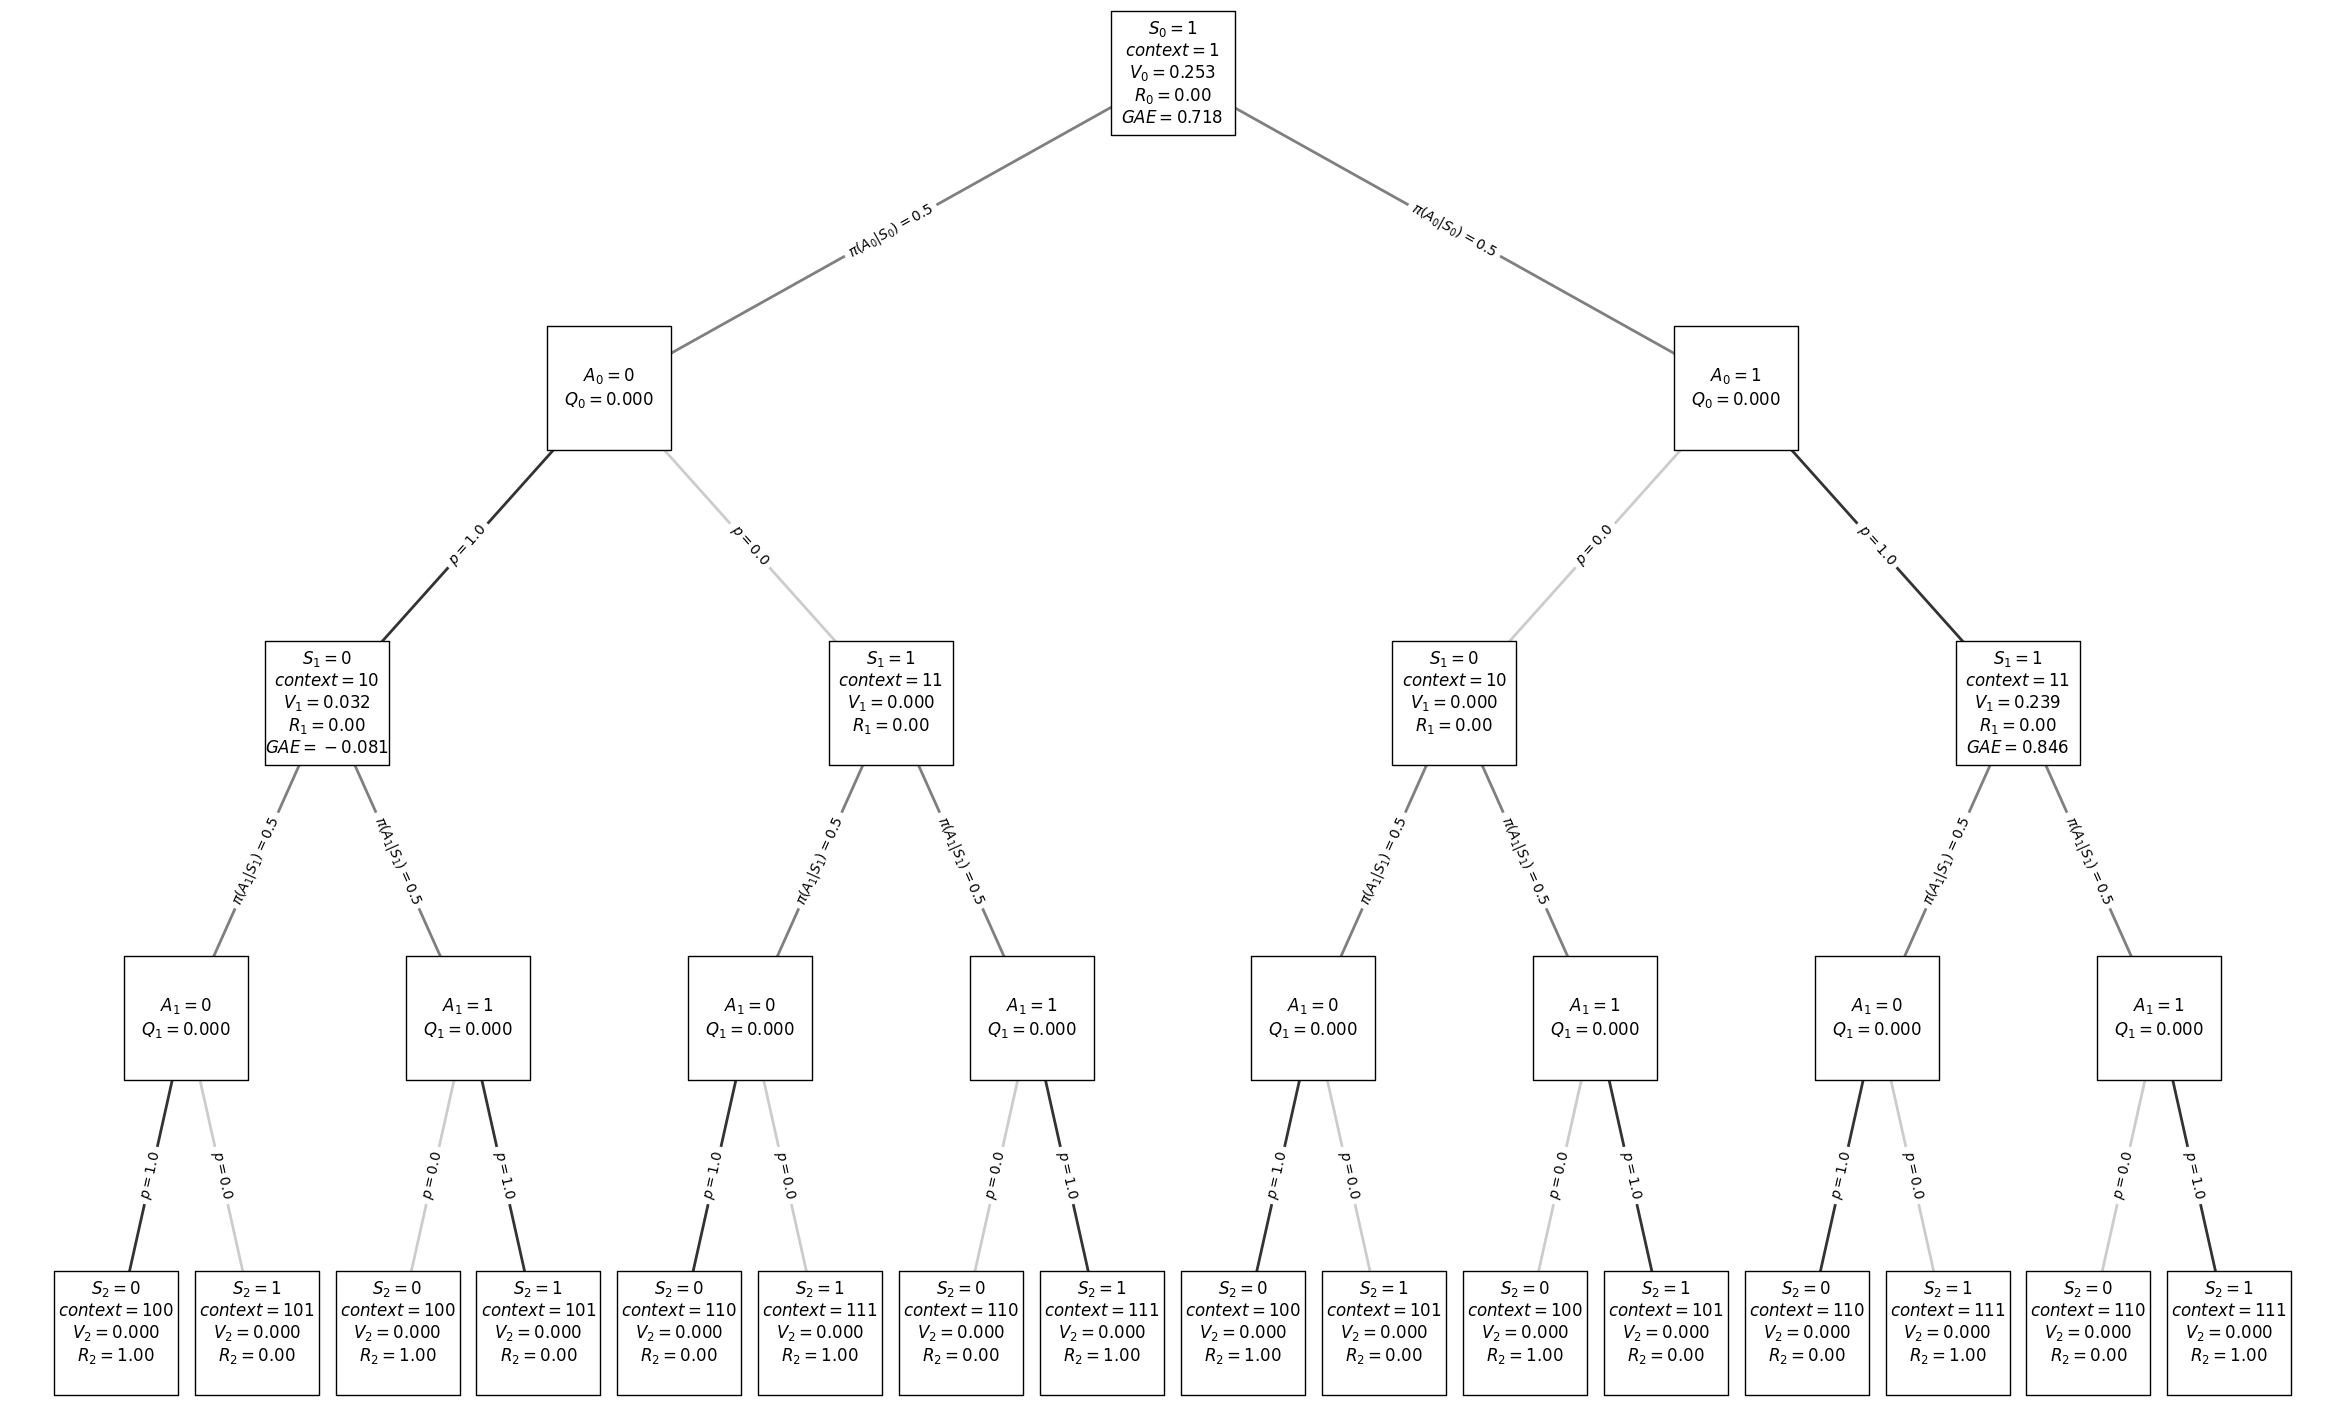

In [5]:
# A MDP with two timesteps
root: StateNode = StateNode(identifier=1, timesteps=2, t=0, parent=None)
mdp: MDP = MDP(root, gamma=0.9, lam=1.0)

# Add transition probabilities and rewards
mdp.init()

# Add a uniform random policy
mdp.add_random_policy()

# Iteratively compute the state values for a stochastic policy
for _ in range(10):
    mdp.gae()
    mdp.update_state_values(learning_rate=0.1)
mdpviz.draw(mdp, path=None)

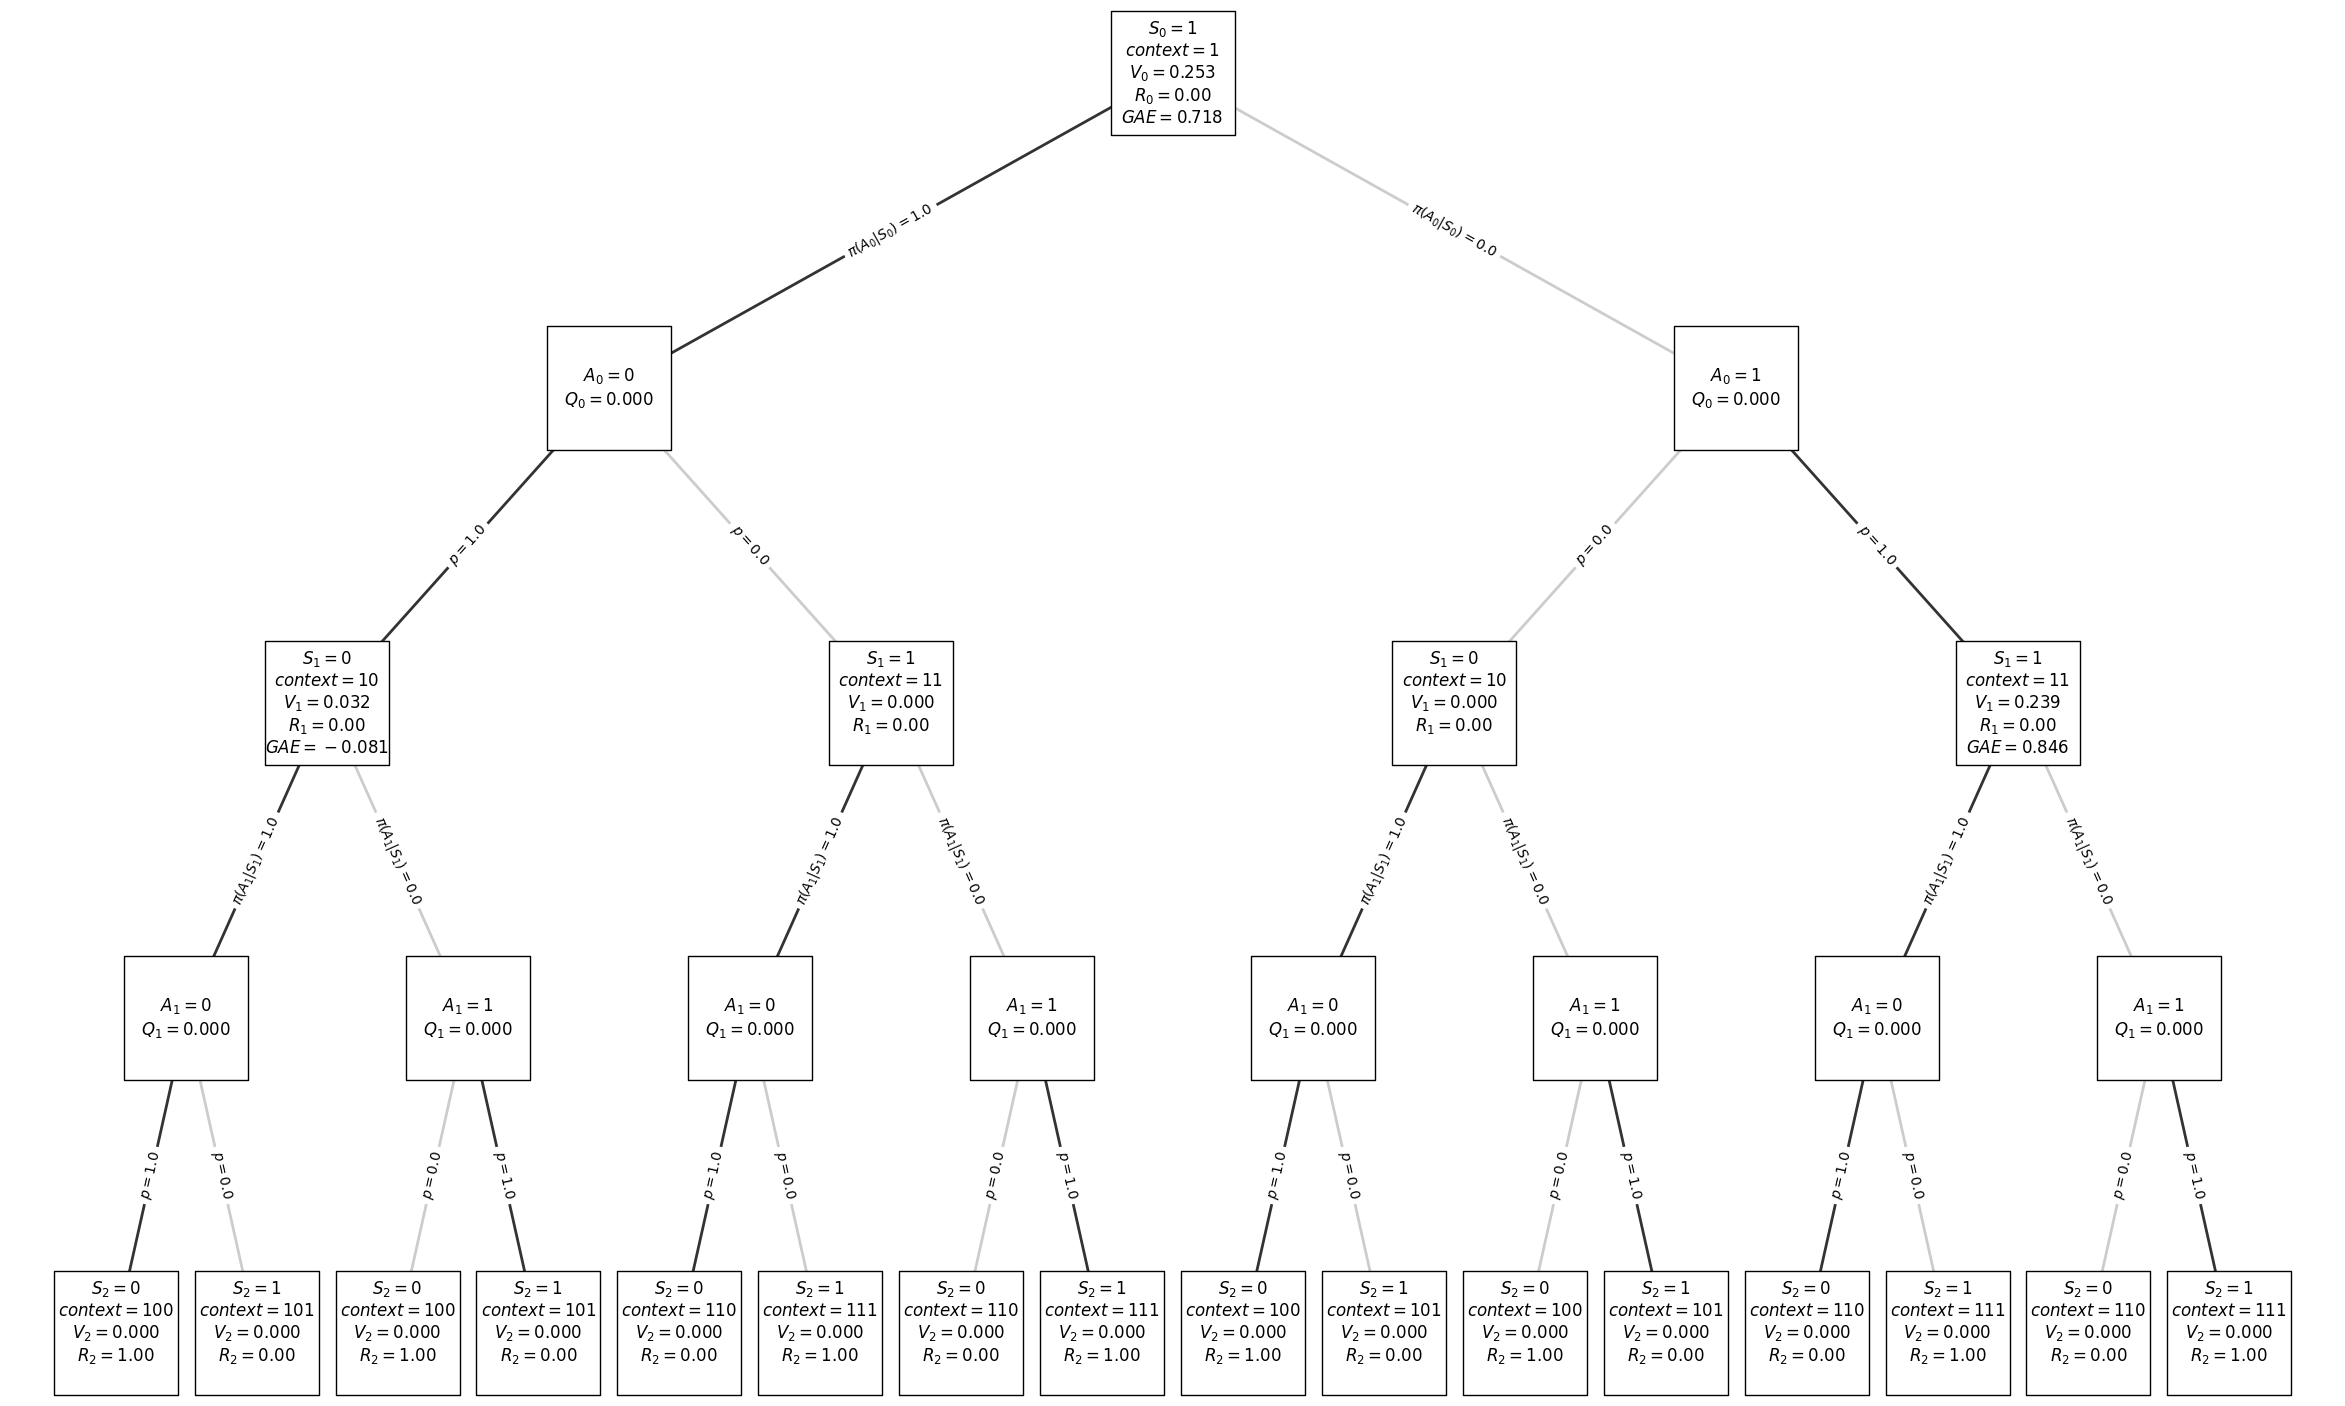

In [6]:
# Now, we have the state values for a random policy
# The state values alone are sufficient to determine a policy because we can compute the action values. 
# action_value = transition_prob * (reward + gamma * state_value)
# We make the policy greedy by assigning the action with the highest action value a probability of 1
mdp.policy_improvement()
mdpviz.draw(mdp, path=None)

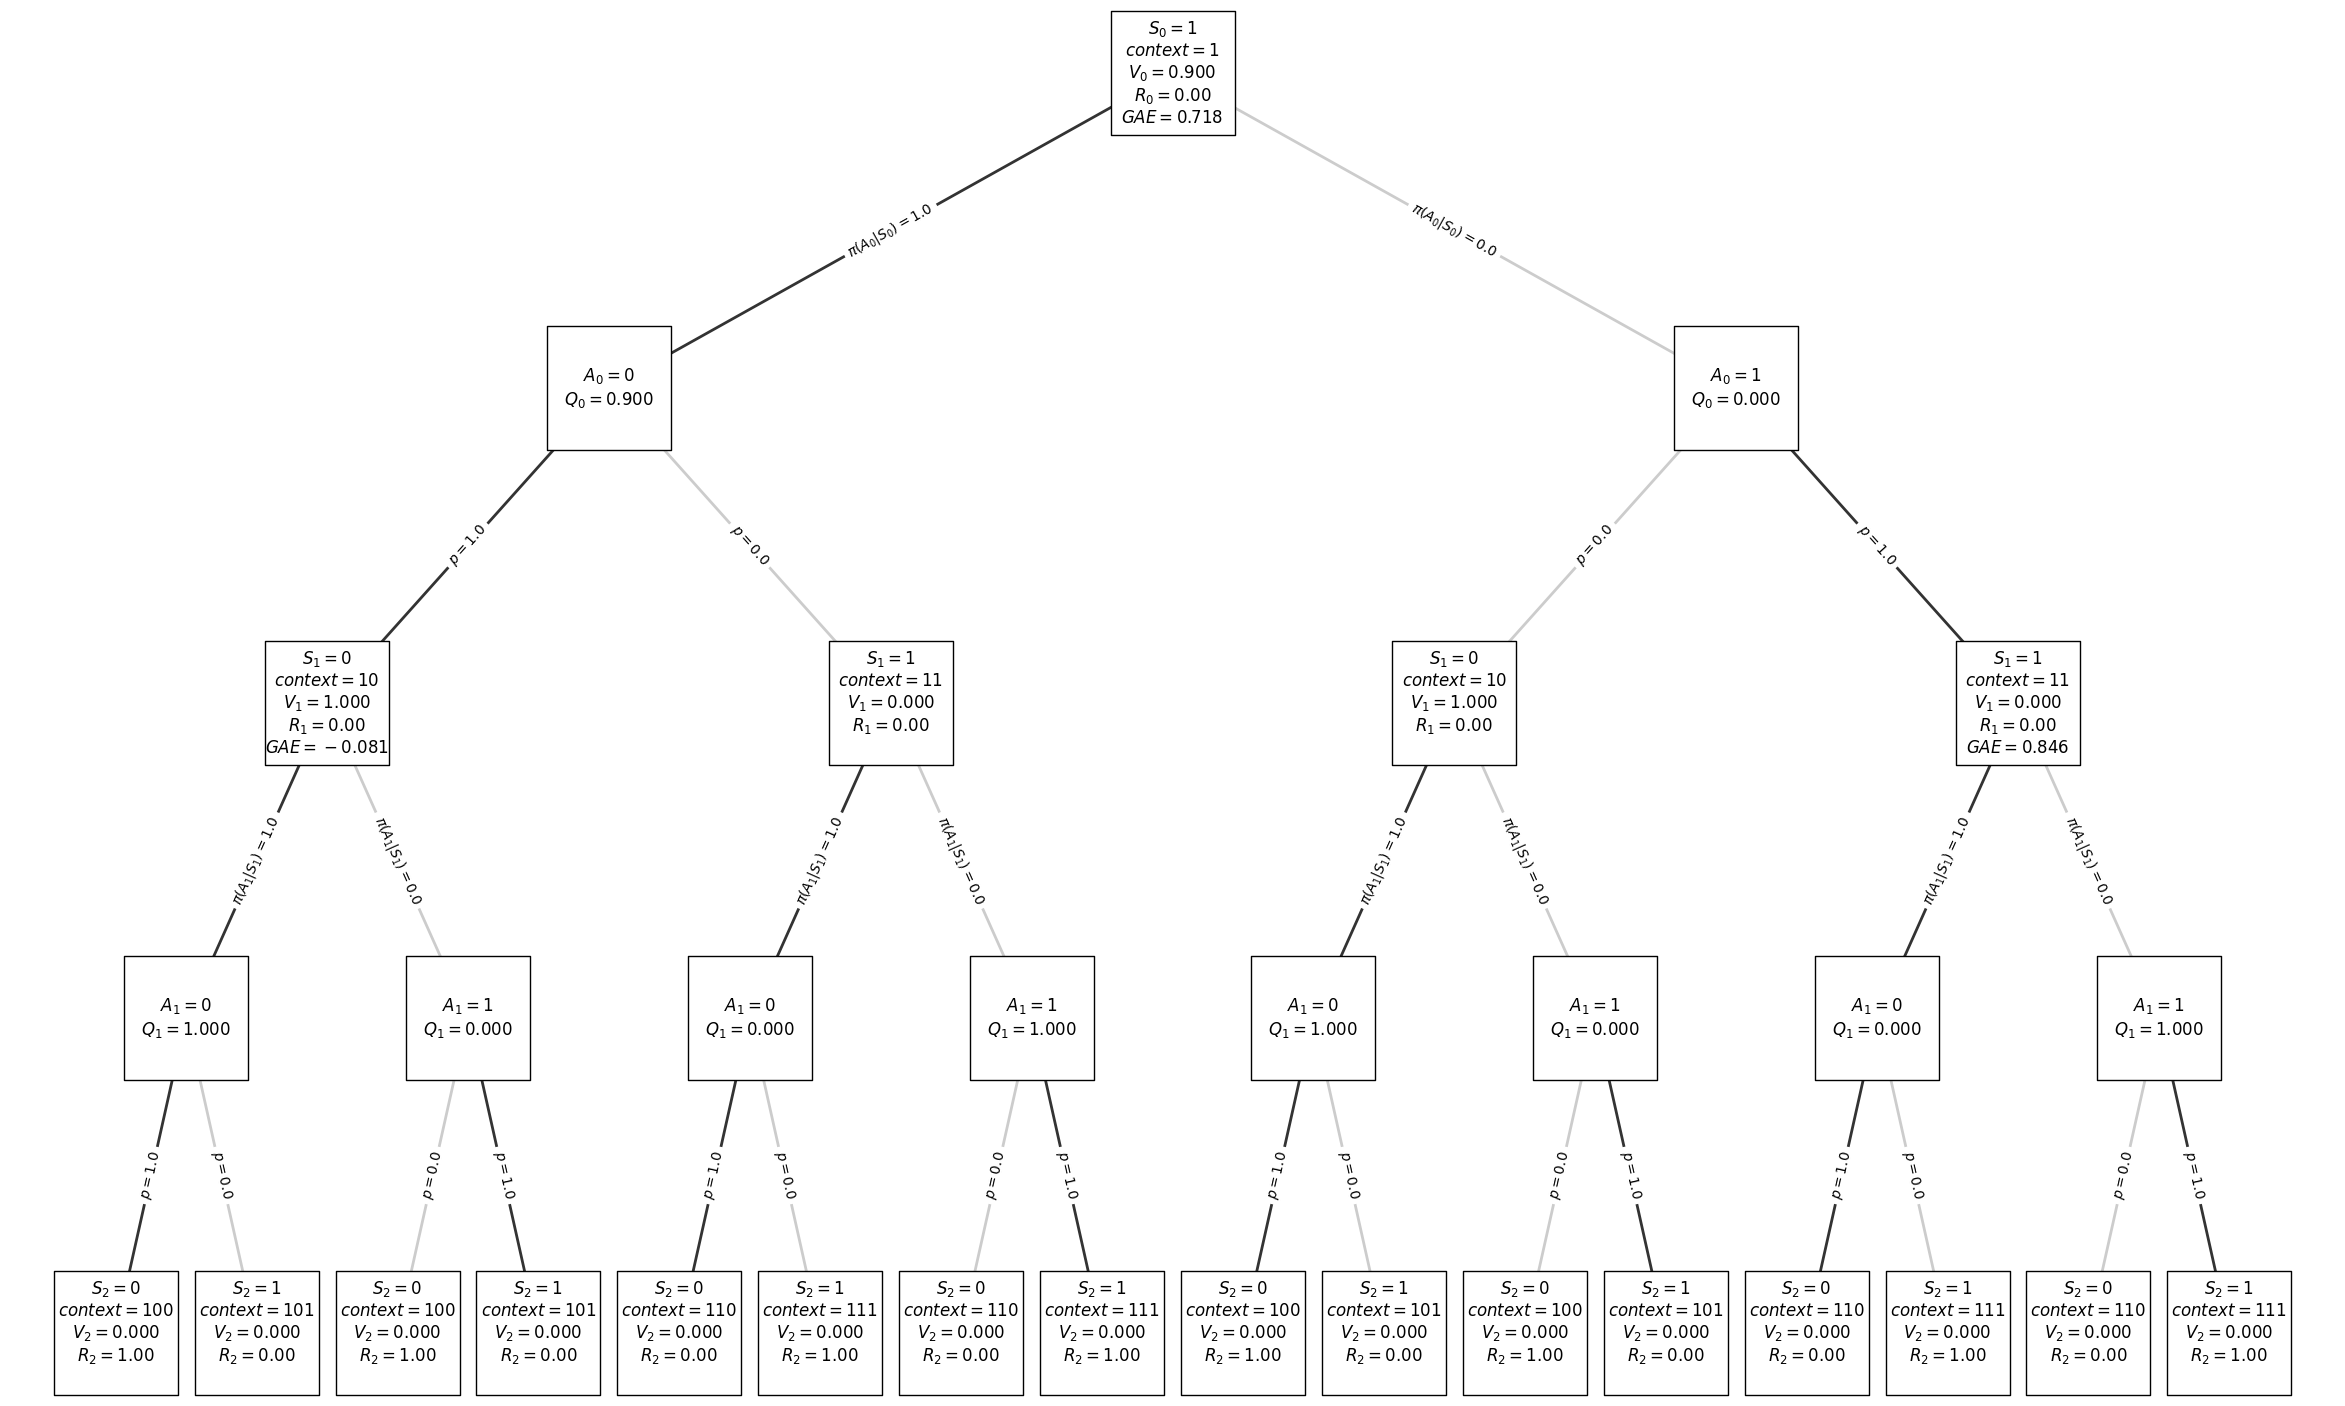

In [8]:
# Update state and action values with the new policy
# For the trajectory S0=1,A0=0,S1=0,A1=1,S2=0 with R2=1 the state values are:
# V0 = γ * R2 = 0.9 * 1 = 0.9
# V1 = R2 = 1
mdp.update_values()
mdpviz.draw(mdp, path=None)